In [1]:
from forward_backward_sweep import ForwardBackwardSweep
import numpy as np
import matplotlib.pyplot as plt

# **DEFINITION OF THE REQUIRED FUNCTIONS**

State equation:
$$
     \begin{pmatrix}
      \dot{\chi}_0\\
      \dot{\chi}_1\\
      \dot{\chi}_2
    \end{pmatrix} =\begin{pmatrix}
        (2 p_0 -1) \; \xi \; \chi_0 + 2 \; p_d \; \chi_1 - u_0\; \chi_0 \\
        2(1-p_0) \; \xi \; \chi_0 + (2p_1-1)  \; \chi_1 - u_1 \; \chi_1 \\
        2(1-p_1 - p_d) \; \chi_1 - u_2 \; \chi_2
    \end{pmatrix} = \begin{pmatrix}
      f_0\\
      f_1\\
      f_2
    \end{pmatrix}
$$

Costate equation:
$$   \begin{pmatrix}
      \dot{\lambda}_0\\
      \dot{\lambda}_1\\
      \dot{\lambda}_2
    \end{pmatrix} = - \begin{pmatrix}
        1 + \left[(2 p_0 -1) \; \xi - u_0 \right]\lambda_0 + 2 (1-p_0) \; \xi \lambda_1 \\
        1 + 2 p_d  \lambda_0 +  (2 p_1 -1 - u_1)\lambda_1 + 2 (1-p_1 - p_d)\lambda_2  \\
        1 -  u_2 \lambda_2 
    \end{pmatrix}
$$


Controller:
$$   \begin{pmatrix}
      u_0\\
      u_1\\
      u_2
    \end{pmatrix} =  \begin{pmatrix}
        \lambda_0 \chi_0 / \gamma\\
        \lambda_1 \chi_1 / \gamma\\
        \lambda_2 \chi_2 / \gamma
    \end{pmatrix}
$$

Boundary conditions:

$$ \begin{align*}
  \lambda_i (T) & = 0  \\ 
  \chi_i (0) & = \chi^{(i)}_0
\end{align*}
$$
for $i=0,1,2$ 

In [2]:
# Functions: state equations, costate equations and optimality condition

def state_eqs(x, u, p0, p1, pd, xi):

  f0 = (2*p0-1)*xi*x[0] + 2*pd*x[1] - u[0]*x[0]
  f1 = 2*(1-p0)*xi*x[0] + (2*p1-1)*x[1] - u[1]*x[1]
  f2 = 2*(1-p1-pd)*x[1] - u[2]*x[2]
  
  return np.array([f0, f1, f2])


def costate_eqs(lmbda, x, u, p0, p1, pd, xi):

  l0 = - 1 - ((2*p0-1)*xi - u[0])*lmbda[0] - 2*(1-p0)*xi*lmbda[1]
  l1 = - 1 - 2*pd*lmbda[0] -(2*p1-1 - u[1])*lmbda[1] - 2*(1-p1-pd)*lmbda[2]
  l2 = - 1 + u[2]*lmbda[2]

  return np.array([l0, l1, l2])

def optimality_condition(x, u, lmbda):
  return np.multiply(x, lmbda)/ gamma

# **COMPUTING THE SOLUTION FOR DIFFERENT MODEL PARAMETERS**

## **No dedifferentiation probablity:**

In [5]:
args = (0.51, 0.51, 0, 1)         # model parameters:(p0, p1, pd= 0, xi)
Ntotal = 100000                   # number of time steps
t_0 = 0
t_f = 10                         

gamma = 10                        # tunning parameter

iterationmax = 11                 # number of maximum iterations

#Initial guess of the controller u 
#this is a matrix of size 3xNtotal
u = np.zeros((3, Ntotal))

#boundary conditions
x_zero = np.array([1., 3., 2.]) 
lambda_final = np.zeros(3)  

In [6]:
model1 = ForwardBackwardSweep(state_eqs, costate_eqs, optimality_condition, u, x_zero, lambda_final,args_st=args, args_cos= args,
            t_0 = t_0, t_f = t_f, Ntotal = Ntotal, iterationmax = iterationmax, error_history = True)
sol_model1 = model1.solve()

Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.
Iteration 6 completed.
Iteration 7 completed.
Iteration 8 completed.
Iteration 9 completed.
Iteration 10 completed.
Iteration 11 completed.


In [7]:
model1_1 = model1 = ForwardBackwardSweep(state_eqs, costate_eqs, optimality_condition, u, x_zero, lambda_final,args_st=args, args_cos= args,
            t_0 = t_0, t_f = t_f, Ntotal = Ntotal, iterationmax = 2)
sol_model1_1 = model1_1.solve()

Iteration 1 completed.
Iteration 2 completed.


### **The solutions are in the form: (x, lmbda, u, errors)**

### **PLOTS**

In [53]:
def control_plots(t, model1, model2, titleA, colors):
  plt.rcParams['xtick.labelsize'] = 11
  plt.rcParams['ytick.labelsize'] = 11
  fig, ax = plt.subplots(2,2, figsize=(10,7))

  ax[0,1].plot(t, model1[2][0,:], color = colors[0], linestyle = '-', linewidth = 2)
  ax[0,1].plot(t, model1[2][1,:], color = colors[1], linestyle = '-', linewidth = 2)
  ax[0,1].plot(t, model1[2][2,:], color = colors[2], linestyle = '-', linewidth = 2)

  ax[1,1].plot(t, model1[0][0,:], color = colors[0], linestyle = '-', linewidth = 2)
  ax[1,1].plot(t, model1[0][1,:], color = colors[1], linestyle = '-', linewidth = 2)
  ax[1,1].plot(t, model1[0][2,:], color = colors[2], linestyle = '-', linewidth = 2)

  ax[0,0].plot(t, model2[2][0,:], color = colors[0], linestyle = '-', linewidth = 2)
  ax[0,0].plot(t, model2[2][1,:], color = colors[1], linestyle = '-', linewidth = 2)
  ax[0,0].plot(t, model2[2][2,:], color = colors[2], linestyle = '-', linewidth = 2)

  ax[1,0].plot(t, model2[0][0,:], color = colors[0], linestyle = '-', linewidth = 2, label = 'CSC')
  ax[1,0].plot(t, model2[0][1,:], color = colors[1], linestyle = '-', linewidth = 2, label = 'TA cells')
  ax[1,0].plot(t, model2[0][2,:], color = colors[2], linestyle = '-', linewidth = 2, label = 'Differentiated CC')

  fig.tight_layout(pad=4.0)

  leg = ax[1,0].legend(bbox_to_anchor=(0.99, 0.99))
  leg.get_frame().set_linewidth(0.0)

  for i in range(2):
      ax[0,i].set_ylabel('Control strength', size = 'x-large', labelpad = 8)
      ax[1,i].set_ylabel('Number of cells', size = 'x-large', labelpad = 8)
      ax[0,i].set_xlabel('Time', size = 'x-large', labelpad = 8)
      ax[1,i].set_xlabel('Time', size = 'x-large', labelpad = 8)


  for j in range(2): 
    ax[0,j].set_title(titleA[j], size ='large', fontweight = 'bold', pad = 15)

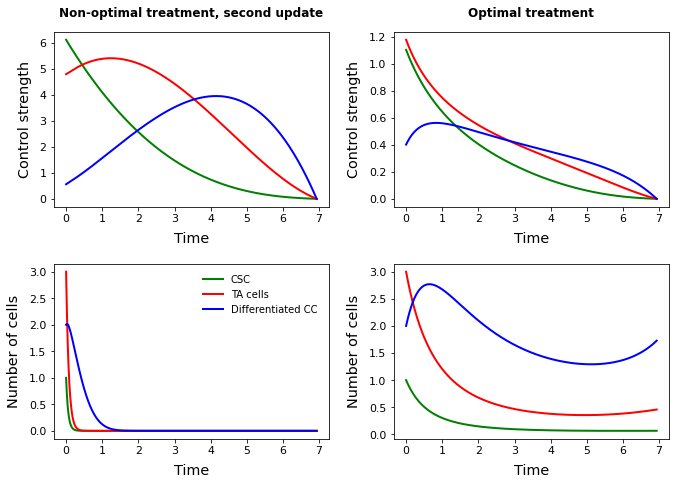

In [54]:
t = np.linspace(0, t_f*np.log(2), Ntotal)
colors = ('green', 'red', 'blue')
titles = ['Non-optimal treatment, second update','Optimal treatment']

control_plots(t, sol_model1, sol_model1_1, titles, colors)

### **Error plots**

In [56]:
def error_plots(errors_dict, iterationmax, model_title = None):
    fig_error, axs_error = plt.subplots(1,3, figsize = (18, 5)) 
    if model_title != None: fig_error.suptitle(model_title, y=1.01, fontweight = 'bold', fontsize = 'xx-large')
    errors_ = errors_dict
    x = np.arange(1,iterationmax+1)
    for i in errors_.keys():
        axs_error[int(i)].plot(x[2:], errors_[i][0][2:], color = 'blue', linestyle = '-', linewidth = 2, label = 'Cell numbers for $\chi_{}$'.format(int(i)))
        axs_error[int(i)].plot(x[2:], errors_[i][1][2:], color = 'green', linestyle = '-', linewidth = 2, label = '$\lambda$ for $\chi_{}$'.format(int(i)))
        axs_error[int(i)].plot(x[2:], errors_[i][2][2:], color = 'red', linestyle = '-', linewidth = 2, label = 'Controller for $\chi_{}$'.format(int(i)))
        leg = axs_error[int(i)].legend(bbox_to_anchor=(0.99, 0.99))
        leg.get_frame().set_linewidth(0.0)

        axs_error[int(i)].set_ylabel('Error', size = 'x-large', labelpad = 8)
        axs_error[int(i)].set_xlabel('Iterations', size = 'x-large', labelpad = 8)


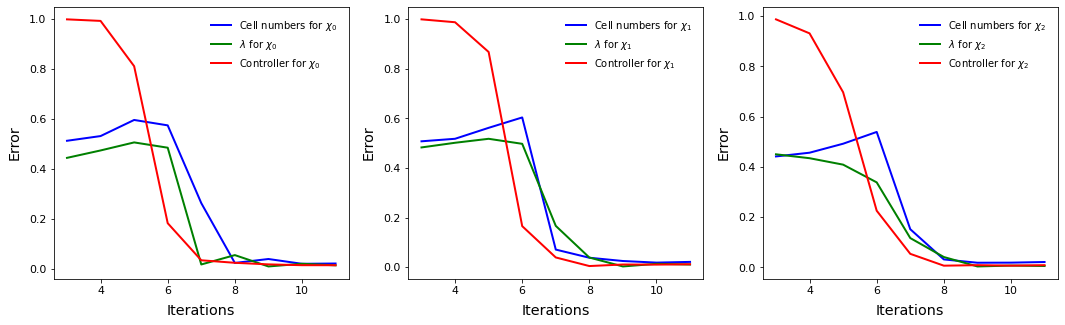

In [57]:
error_plots(sol_model1[3], iterationmax)

## **Dedifferentiation probability $p_d= p_1/10$**

In [23]:
args2 = (0.41, 0.31, 0.31/10, 1)   # model parameters:(p0, p1, pd= p1/10, xi)
iterationmax2 = 15
x_zero_ = np.array([1., 10., 250.]) 

# model with args2 and x_zero, i.e. Initial conditions [1.,3.,2.]
model2 = ForwardBackwardSweep(state_eqs, costate_eqs, optimality_condition, u, x_zero, lambda_final,args_st=args2, args_cos= args2,
            t_0 = t_0, t_f = t_f, Ntotal = Ntotal, iterationmax = iterationmax2, error_history = True)
sol_model2 = model2.solve()

Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.
Iteration 6 completed.
Iteration 7 completed.
Iteration 8 completed.
Iteration 9 completed.
Iteration 10 completed.
Iteration 11 completed.
Iteration 12 completed.
Iteration 13 completed.
Iteration 14 completed.
Iteration 15 completed.


In [24]:
# model with args2 and x_zero_, i.e. Initial conditions [1., 10., 250.]
model3 = ForwardBackwardSweep(state_eqs, costate_eqs, optimality_condition, u, x_zero_, lambda_final,args_st=args2, args_cos= args2,
            t_0 = t_0, t_f = t_f, Ntotal = Ntotal, iterationmax = iterationmax2, error_history = True)
sol_model3 = model3.solve()

Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.
Iteration 6 completed.
Iteration 7 completed.
Iteration 8 completed.
Iteration 9 completed.
Iteration 10 completed.
Iteration 11 completed.
Iteration 12 completed.
Iteration 13 completed.
Iteration 14 completed.
Iteration 15 completed.


### **PLOTS**

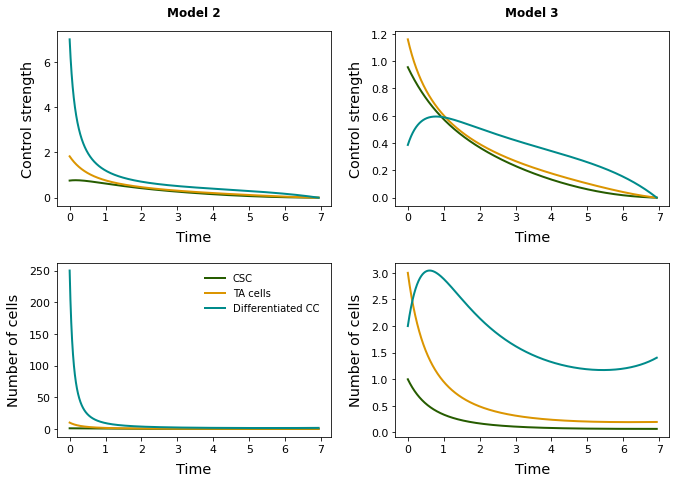

In [55]:
colors_ = ('#265C00', '#DB9501', 'darkcyan')
titles_ = ['Model 2','Model 3']
t = np.linspace(0, t_f*np.log(2), Ntotal)

control_plots(t, sol_model2, sol_model3, titles_, colors_)

### **Error plots**

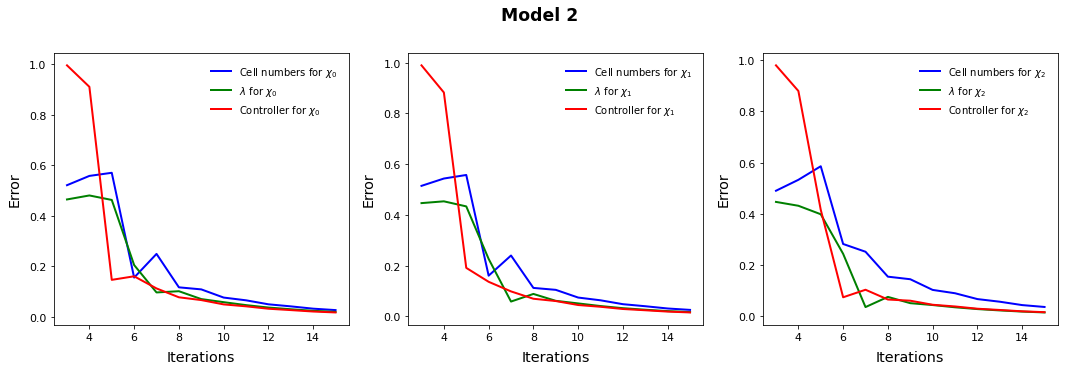

In [58]:
error_plots(sol_model2[3], iterationmax2, 'Model 2')

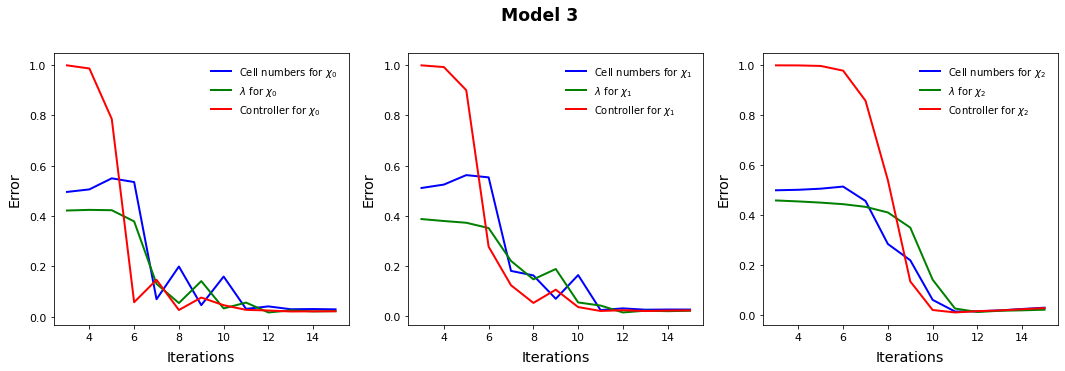

In [59]:
error_plots(sol_model3[3], iterationmax2, 'Model 3')